# 11 Reprojecting

In this section we will:
- practice merging data frames
- apply `if-else` statements for flow control
- reproject geospatial data 
- create a choropleth map

## About the data

The first dataset we will use is a [list of Arctic communities and their location](https://search.dataone.org/view/doi%3A10.18739%2FA28S4JQ80) @brook_approximate_2023 created by the [Alaska Native Tribal Health Consortium](https://www.anthc.org). This data comess in GeoJSON file with the following attributes:

- **name**: name of Arctic community, 
- **population**: population of Arctic community, as of 2022
- **country**: country that the Arctic community falls within (see dataset metadata for the codes)
- **geoname-id**: numeric codes that uniquely identify all administrative/legal and statistical geographic areas for which the Census Bureau tabulates data

The second dataset is [Natural Earth's medium scale  cultural boundaries data for countries (1:50m)](https://www.naturalearthdata.com/downloads/50m-cultural-vectors/). 
We can obtain this dataset by downloading the shapefile. 
[Natural Earth](https://www.naturalearthdata.com) is a public domain dataset with ready-to-use data for creating maps. 

## Import data

We will first import the countries shapefile and adapt it for wrangling purposes:

**EXERCISE** 

The following code has 4 bugs, find them and correct them in order to udpate the data.

In [14]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

"""
Set environment variable 'PROJ_LIB' to specify the path for the PROJ library
Resolves ERROR 1: PROJ: proj_create_from_database
"""""
os.environ['PROJ_LIB'] = '/opt/anaconda3/share/proj'

# -------------------------------------------------------
# Import data

# Path to course data folder
data_folder_fp = os.path.join('/',
                              'courses',
                              'EDS220', 
                              'data')

# Import countries shapefile
fp = os.path.join(data_folder_fp, 
                  'ne_50m_admin_0_countries', 
                  'ne_50m_admin_0_countries.shp')
countries = gpd.read_file(fp)
countries.columns = countries.columns.str.lower()  # Simplify column names

# Import Arctic communities GeoJSON directly from URL
URL = 'https://cn.dataone.org/cn/v2/resolve/urn%3Auuid%3Aed7718ae-fb0d-43dd-9270-fbfe80bfc7a4'
communities = gpd.read_file(URL)

# Import country names CSV
fp = os.path.join(data_folder_fp, 
                  'country_names', 
                  'country_names.csv')
country_names = pd.read_csv(fp)

In [15]:
countries = countries[['admin', 'type', 'geometry']]
countries.head(3)

admin               type  \
0  Zimbabwe  Sovereign country   
1    Zambia  Sovereign country   
2     Yemen  Sovereign country   

                                            geometry  
0  POLYGON ((31.28789 -22.40205, 31.19727 -22.344...  
1  POLYGON ((30.39609 -15.64307, 30.25068 -15.643...  
2  MULTIPOLYGON (((53.08564 16.64839, 52.58145 16...

In [7]:
communities.head(3)

Empty DataFrame
Columns: [{"type":"FeatureCollection", features:[{"type":"Feature", geometry:{"type":"Point", coordinates:[34.9925, 57.87944]}, properties:{"name":"Udomlya", population:32373, country:"RU", geoname-id:452949}}, {"type":"Feature", geometry:{"type":"Point".1, coordinates:[25.42751, 57.54108]}, properties:{"name":"Valmiera", population:26963, country:"LV", geoname-id:453754}}, {"type":"Feature".1, geometry:{"type":"Point".2, coordinates:[21.57288, 57.38988]}, properties:{"name":"Ventspils", population:42644, country:"LV".1, geoname-id:454310}}, {"type":"Feature".2, geometry:{"type":"Point".3, coordinates:[21.01667, 56.53333]}, properties:{"name":"Vec-Liepāja", population:85260, country:"LV".2, geoname-id:454432}}, {"type":"Feature".3, geometry:{"type":"Point".4, coordinates:[23.15528, 56.96694]}, properties:{"name":"Tukums", population:18348, country:"LV".3, geoname-id:454768}}, {"type":"Feature".4, geometry:{"type":"Point".5, coordinates:[22.58137, 57.24562]}, properties:{"name":"Talsi", population:12022, country:"LV".4, geoname-id:454970}}, {"type":"Feature".5, geometry:{"type":"Point".6, coordinates:[24.86472, 57.15194]}, properties:{"name":"Sigulda", population:10422, country:"LV".5, geoname-id:455718}}, {"type":"Feature".6, geometry:{"type":"Point".7, coordinates:[22.48807, 56.66363]}, properties:{"name":"Saldus", population:12224, country:"LV".6, geoname-id:455890}}, {"type":"Feature".7, geometry:{"type":"Point".8, coordinates:[24.36544, 56.86014]}, properties:{"name":"Salaspils", population:17606, country:"LV".7, geoname-id:455898}}, {"type":"Feature".8, geometry:{"type":"Point".9, coordinates:[24.10589, 56.946]}, properties:{"name":"Riga", population:742572, country:"LV".8, geoname-id:456172}}, {"type":"Feature".9, geometry:{"type":"Point".10, coordinates:[27.31667, 56.5]}, properties:{"name":"Rēzekne", population:38340, country:"LV".9, geoname-id:456202}}, {"type":"Feature".10, geometry:{"type":"Point".11, coordinates:[23.93806, 56.78528]}, properties:{"name":"Olaine", population:12584, country:"LV".10, geoname-id:457052}}, {"type":"Feature".11, geometry:{"type":"Point".12, coordinates:[24.61401, ...]
Index: []

[0 rows x 11393 columns]

In [8]:
country_names

country                     admin
0       RU                    Russia
1       LV                    Latvia
2       EE                   Estonia
3       LT                 Lithuania
4       SE                    Sweden
5       BY                   Belarus
6       FI                   Finland
7       NO                    Norway
8       DK                   Denmark
9       FO             Faroe Islands
10      IS                   Iceland
11      GB            United Kingdom
12      AX             Aland Islands
13      GL                 Greenland
14      US  United States of America
15      CA                    Canada

In [9]:
print(countries.crs)

GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433],AXIS["Longitude",EAST],AXIS["Latitude",NORTH]]


In [16]:
countries = countries.to_crs(communities.crs)

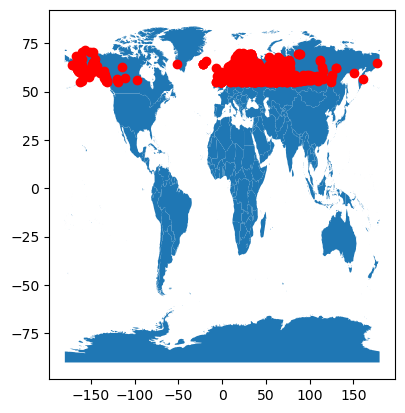

In [17]:
# Verify CRSs match
assert countries.crs == communities.crs

fig, ax = plt.subplots()
countries.plot(ax=ax)
communities.plot(ax=ax, color='red')
plt.show()

Arctic communities by country
Next, we want to calculate the number of Arctic communities by country.

In [23]:
# Create data frame with number of communities per country
n_comms = (communities.groupby('country')
                      .size()
                      .reset_index(name='n_communities'))

if-else statements
Our goal is to merge the n_comms and the countries data frames. To merge two data frames they need to have at least one column in common. Currently our datasets do not have any columns in common:

In [25]:
countries.columns


Index(['admin', 'type', 'geometry'], dtype='object')

In [26]:
n_comms.columns

Index(['country', 'n_communities'], dtype='object')

In [27]:
set(countries.columns).intersection(n_comms.columns)

set()

Merging data frames
We can use the country_names data frame to add the names countries into the n_comms data which, in turn, will allow us to merge that data frame with the country_names data. To merge dataframes we can use the pandas.merge() function. The basic syntax for it is:

```python
output_df = pd.merge(left_df,
                     right_df, 
                     how = type_of_join, 
                     on = column_to_join)
```

output_df is the dataframe resulting from the merge,
left_df is the dataframe we have “on the left side”,
right_df is the dataframe we have “on the right side”,
how specifies the type of join between the left and right dataframes, (check the options here), the default is to do an inner join,
on specifies the column to join on, this column must be present in both our dataframes.

In [28]:
n_comms = pd.merge(n_comms,
                   country_names,
                   how='left',
                   on='country')
n_comms

country  n_communities                     admin
0       AX              1             Aland Islands
1       BY              8                   Belarus
2       CA              7                    Canada
3       DK             72                   Denmark
4       EE             14                   Estonia
5       FI             98                   Finland
6       FO              1             Faroe Islands
7       GB             96            United Kingdom
8       GL              1                 Greenland
9       IS              5                   Iceland
10      LT             26                 Lithuania
11      LV             25                    Latvia
12      NO             48                    Norway
13      RU            774                    Russia
14      SE            133                    Sweden
15      US            115  United States of America

In [30]:
artic_countries = pd.merge(countries, n_comms, how='inner', on='admin')

In [31]:
artic_countries

admin               type  \
0   United States of America            Country   
1             United Kingdom            Country   
2                     Sweden  Sovereign country   
3                     Russia  Sovereign country   
4                     Norway  Sovereign country   
5                  Lithuania  Sovereign country   
6                     Latvia  Sovereign country   
7                    Iceland  Sovereign country   
8                    Finland            Country   
9                    Estonia  Sovereign country   
10                 Greenland            Country   
11             Faroe Islands         Dependency   
12                   Denmark            Country   
13                    Canada  Sovereign country   
14                   Belarus  Sovereign country   

                                             geometry country  n_communities  
0   MULTIPOLYGON (((-132.74687 56.52568, -132.7576...      US            115  
1   MULTIPOLYGON (((-2.66768 51.62300, -2.74214 51...      GB             96  
2   MULTIPOLYGON (((19.07646 57.83594, 18.99375 57...      SE            133  
3   MULTIPOLYGON (((145.88154 43.45952, 145.89561 ...      RU            774  
4   MULTIPOLYGON (((20.62217 69.03687, 20.49199 69...      NO             48  
5   MULTIPOLYGON (((20.95781 55.27891, 20.89980 55...      LT             26  
6   POLYGON ((26.59355 55.66753, 26.54287 55.67241...      LV             25  
7   POLYGON ((-15.54312 66.22852, -15.42847 66.224...      IS              5  
8   MULTIPOLYGON (((24.15547 65.80527, 24.04902 65...      FI             98  
9   MULTIPOLYGON (((27.35195 57.52812, 27.32656 57...      EE             14  
10  MULTIPOLYGON (((-29.95288 83.56484, -28.99199 ...      GL              1  
11  MULTIPOLYGON (((-6.62319 61.80596, -6.64277 61...      FO              1  
12  MULTIPOLYGON (((12.56875 55.78506, 12.57119 55...      DK             72  
13  MULTIPOLYGON (((-132.65552 54.12749, -132.5640...      CA              7  
14  POLYGON ((31.76338 52.10107, 31.57373 52.10811...      BY              8

In [33]:
n_comms

country  n_communities                     admin
0       AX              1             Aland Islands
1       BY              8                   Belarus
2       CA              7                    Canada
3       DK             72                   Denmark
4       EE             14                   Estonia
5       FI             98                   Finland
6       FO              1             Faroe Islands
7       GB             96            United Kingdom
8       GL              1                 Greenland
9       IS              5                   Iceland
10      LT             26                 Lithuania
11      LV             25                    Latvia
12      NO             48                    Norway
13      RU            774                    Russia
14      SE            133                    Sweden
15      US            115  United States of America

In [39]:
artic_countries.at[8, 'n_communities'] += 1

In [41]:
# Reproject to CRS optimized for Arctic region
artic_countries = artic_countries.to_crs('epsg:3413')

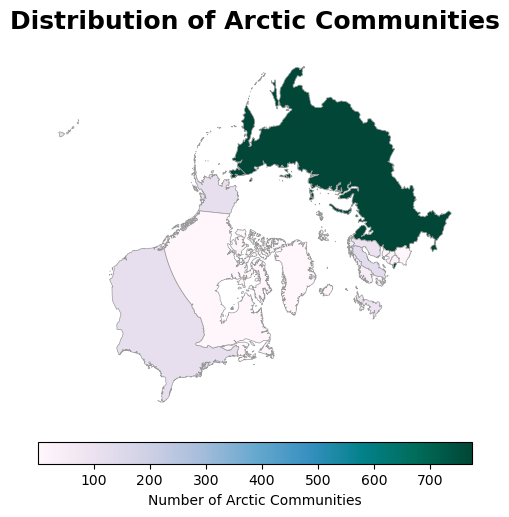

In [43]:
fig, ax = plt.subplots(figsize=(8, 6))

# Remove the axis for a cleaner map
ax.axis('off')

# Create choropleth map of communities
# Plot with refined color and edge style
artic_countries.plot(
    ax=ax,
    column='n_communities',
    cmap='PuBuGn',
    legend=True,
    edgecolor="0.6",
    linewidth=0.5,
    legend_kwds={
        "shrink": 0.7,
        "label": "Number of Arctic Communities",
        "orientation": "horizontal",
        "pad": 0.05
    }
)

# Add title and subtitle for better context
ax.set_title('Distribution of Arctic Communities', fontsize=18, weight='bold', pad=15)

plt.show()